在多维输入中，输入的数据集为 N 行 M 列，其中一行叫做一个样本（Sample）或者  Record ，即：  
![](https://pic.imgdb.cn/item/65979cfe871b83018ad58600.jpg)  
一列叫做一个特征（Feature）或者 字段，即：  
![](https://pic.imgdb.cn/item/65979d40871b83018ad66af3.jpg)  
读入的数据集分为 X 和 Y 两个部分，有时候需要自己划分，上述图片里面的数据集是 Diabetes Dataset，糖尿病患者数据集，其中前 8 列是特征，最后一列是一年后病症是否加重。  
sklearn 中也有对应的数据集，一般后缀表示为 gz，即 Linux 下的压缩包，解压缩后为 csv 文件，csv 文件采用空格
区别每一列，但是 excel 里面采用 ‘ ， ’ 或者 ‘ Tab ’ 区别每一列，因此 excel 打开 csv 文件显示并不人性化。  
当输入数据集变为多维后，模型也会发生变化  
![](https://pic.imgdb.cn/item/65979ef0871b83018adc9fdd.jpg)  
原本只需要进行向量的计算，现在需要进行矩阵的运算，即计算 $\sum_{n=1}^8x_n^{(i)}\cdot\omega_n=\begin{bmatrix}x_1^{(i)}&\cdots&x_8^{(i)}\end{bmatrix}\begin{bmatrix}\omega_1\\\vdots\\\omega_8\end{bmatrix}$，对于每一个$\hat{y}$，都需要计算$\begin{bmatrix}\hat{y}^{(1)}\\\vdots\\\hat{y}^{(N)}\end{bmatrix}=\begin{bmatrix}\sigma(z^{(1)})\\\vdots\\\sigma(z^{(N)})\end{bmatrix}=\sigma(\begin{bmatrix}z^{(1)}\\\vdots\\z^{(N)}\end{bmatrix})$，但是将输入数据集视为矩阵后，就可以合并运算，转化为$\begin{aligned}&\begin{bmatrix}z^{(1)}\\\vdots\\z^{(N)}\end{bmatrix}=\begin{bmatrix}x_1^{(1)}&\cdots&x_8^{(1)}\\\vdots&\ddots&\vdots\\x_1^{(N)}&\cdots&x_8^{(N)}\end{bmatrix}\begin{bmatrix}a_1\\\vdots\\a_8\end{bmatrix}+\begin{bmatrix}b\\\vdots\\b\end{bmatrix}\\&\color{red}{N\times1}-----\color{red}{N\times8}---\color{red}{8\times1}-\color{red}{N\times1}\end{aligned}$

对于```self.linear = torch.nn.Linear(8,1)```  
其实对应为输入数据集的维度（列数）和输出数据集的维度，即  
![](https://pic.imgdb.cn/item/6597a1c5871b83018ae6b6db.jpg)  
对于这个数据集，采用如下的神经网络：  
![](https://pic.imgdb.cn/item/6597a278871b83018ae94433.jpg)

下面进行代码实现

In [16]:
import torch
import numpy as np

xy = np.loadtxt('./dataset/diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1])
y_data = torch.from_numpy(xy[:,[-1]])

In [17]:
class Model(torch.nn.Module):
    def __init__(self) -> None:
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
    
model = Model()     

In [18]:
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

/Users/liyang/miniconda3/envs/d2l/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [19]:
loss_list = []

for epoch in range(1000):
    # forward
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)

    # backward
    optimizer.zero_grad()
    loss.backward()
    loss_list.append(loss.item())

    # update
    optimizer.step()

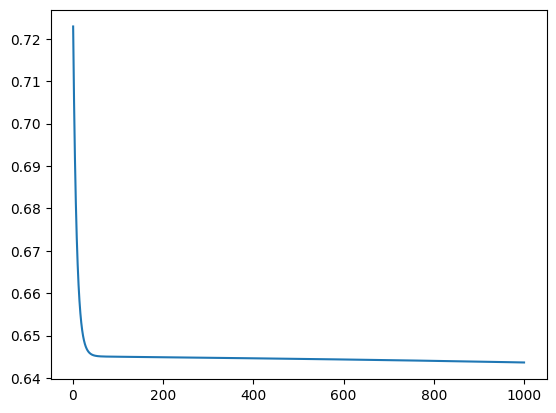

In [20]:
import matplotlib.pyplot as plt
epoch = np.arange(1, 1001, 1)
plt.plot(epoch, loss_list)
plt.show()